# Predicting the Type of a Star Using Data from a Star Dataset

Although this question is already provided as a suggestion in the coding challenge page, I want to continue with the given question and particularly predict star type because that star information seems the most useful to me. Understanding the type of a new star can provide a lot of new information about a star than the other value types (for example, most spectral classes contain multiple types of stars, providing little new information). 

## Step 1: Setting up the notebook

### Importing the dataset and libraries

In [374]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [375]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

## Step 2: Analyzing the Dataset

### Understanding the Dataset

First, I need a preview of the dataset to understand the data I will be dealing with.

In [376]:
df = pd.read_csv('../input/star-dataset/6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Next, I need some information about the dataset columns to understand the types of the data above and if conversions are needed. 

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


I gained a lot of information from this.
1. The dataset contains data of 240 stars. 
2. There are __no null values__ in the entire dataset,so I do not need to remove any rows.
3. The dataset contains 7 columns. One of the columns contains the data I will be predicting, meaning that I need to remove that column, meaning that there are __6__ types of data I will use to predict star type. However, two types of data I will be using for predictions are not numerical (Star color & Spectral Class), so I need to examine them further. 

### Editing the Dataset

I need to view the values and how they are formatted in the two String columns. 

In [378]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

Although the values make sense at first glance, I noticed that many colors are similar. So, I need to combine the colors into general color groups and modify the same colors into one standard form. 

In [379]:
yellow_white = ['Yellowish White', 'yellow-white', 'White-Yellow']
df['Star color'] = df['Star color'].replace(yellow_white, 'Yellow White')

blue_white = ['Blue white', 'Blue-white', 'Blue white ', 'Blue-White']
df['Star color'] = df['Star color'].replace(blue_white, 'Blue White')

white = ['Whitish', 'white']
df['Star color'] = df['Star color'].replace(white, 'White')

df['Star color'] = df['Star color'].replace('Blue ', 'Blue')

yellow = ['yellowish', 'Yellowish']
df['Star color'] = df['Star color'].replace(yellow, 'Yellow')

df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellow White', 'Pale yellow orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

The colors are now more distinct. 

Now the other column.

In [380]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

The values are already distinct, with each carrying a different meaning. No replacements and/or combinations are needed. 

## Step 3: Data Preprocessing

Since there are multiple types of values that will be used to predict star type, a multi label classifier will be used. Although it makes _many_ assumptions, I decided to use a Gaussian Naive Bayes Classifier as it is easy to implement and highly accurate. However, the classifier only accepts numerical values, so I need to transform the String data into a numerical format. 

In [381]:
keys = {}
string_cols = ['Star color','Spectral Class']
for col in string_cols:
    encoder = LabelEncoder() #new encoder needs to be created for each column
    encoder.fit(df[col])
    df[col] = encoder.fit_transform(df[col])
    keys.update(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    
df.iloc[15:25]

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
15,3340,0.00380,0.24000,13.07,1,5,5
16,2799,0.00180,0.16000,14.79,1,5,5
17,3692,0.00367,0.47000,10.80,1,5,5
18,3192,0.00362,0.19670,13.53,1,5,5
19,3441,0.03900,0.35100,11.18,1,5,5
20,25000,0.05600,0.00840,10.58,2,1,1
21,7740,0.00049,0.01234,14.02,2,6,0
22,7220,0.00017,0.01100,14.23,2,6,2
23,8500,0.00050,0.01000,14.50,2,6,0
24,16500,0.01300,0.01400,11.89,2,1,1


The Strings are converted to a numerical format. However, I need to access the key to understand how the encoder encoded the values and converted them to numerical categories. 

In [382]:
keys = list(keys.items())
orig_colors = dict(keys[0:len(df['Star color'].unique())])
orig_spec = dict(keys[len(df['Star color'].unique()):]) #second column starts where first column ends
print("Star colors key:", orig_colors)
print("\nSpectral classes key:", orig_spec) #extra space for easier readibility

Star colors key: {'Blue': 0, 'Blue White': 1, 'Orange': 2, 'Orange-Red': 3, 'Pale yellow orange': 4, 'Red': 5, 'White': 6, 'Yellow': 7, 'Yellow White': 8}

Spectral classes key: {'A': 0, 'B': 1, 'F': 2, 'G': 3, 'K': 4, 'M': 5, 'O': 6}


The encoder accurately converted the strings. Each unique value is mapped to a different integer. 

## Step 4: Data Processing and Modeling

### Data Processing

First, the column I will be predicting needs to be dropped from the dataset. 

In [383]:
outvals = df['Star type'].values
outvals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [384]:
df = df.drop(columns = ['Star type'])
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,5,5
1,3042,0.000500,0.1542,16.60,5,5
2,2600,0.000300,0.1020,18.70,5,5
3,2800,0.000200,0.1600,16.65,5,5
4,1939,0.000138,0.1030,20.06,5,5


The Star Type column is dropped. 

Next, the dataframe needs to be changed into a vector format that the classifier understands. This includes dropping the header row because it is just for descriptive reasons. It has no use to the model in performing predictions. 

In [385]:
invals = df.iloc[:, :].values
invals= np.asarray(invals)
invals

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01,
         5.00000e+00,  5.00000e+00],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01,
         5.00000e+00,  5.00000e+00],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01,
         5.00000e+00,  5.00000e+00],
       ...,
       [ 8.82900e+03,  5.37493e+05,  1.42300e+03, -1.07300e+01,
         6.00000e+00,  0.00000e+00],
       [ 9.23500e+03,  4.04940e+05,  1.11200e+03, -1.12300e+01,
         6.00000e+00,  0.00000e+00],
       [ 3.78820e+04,  2.94903e+05,  1.78300e+03, -7.80000e+00,
         0.00000e+00,  6.00000e+00]])

Since this dataset is the only set of values I have to create the model, I need to split the values so that I can both train and test the model using this dataset's values. This splitting will also ensure that the model is not overfitted. 

In [386]:
invals_train, invals_test, outvals_train, outvals_test = train_test_split(invals, outvals, train_size = 0.70, random_state = 123) #random state set to one random number to ensure results are same every time

In [387]:
print("Training data: {} ({}%)".format(len(invals_train), len(invals_train)/len(invals)*100))
print("Testing data: {} ({}%)".format(len(invals_test), len(invals_test)/len(invals)*100))

Training data: 168 (70.0%)
Testing data: 72 (30.0%)


Next, I need to standardize the input data values to a gaussian distribution because I am using a Gaussian classifier, which assumes that the input is normalized (gaussian) data. 

In [388]:
# feature scaling
scaler = StandardScaler()  
invals_train = scaler.fit_transform(invals_train)  
invals_test = scaler.transform(invals_test) #no need to fit values again since same types of values were fitted on last line

### Data Modeling

Next, I need to create the model. This includes training the data and generating predictions to test accuracy. 

In [389]:
gnbc = GaussianNB()
gnbc.fit(invals_train, outvals_train)
outvals_pred = gnbc.predict(invals_test)

Next, the predictions need to be checked. Is my model accurate?

In [390]:
print("Accuracy: {:.1f}%".format(metrics.accuracy_score(outvals_test, outvals_pred)*100))

Accuracy: 100.0%


My model is perfectly accurate!

## Step 5: Model Visualization

Although my model is 100% accurate, I want to verify this accuracy by examining the distribution of tested values. Were they evenly distributed, ensuring my model can accurately predict any star type? The best way to visually examine test values, and compare them with predicted values (to see where the model is inaccurate) is with a confusion matrix, and the best way to visualize a confusion matrix is with a heatmap. 

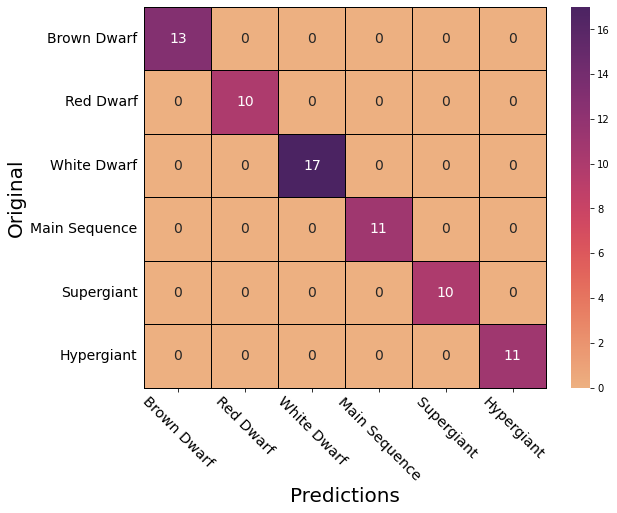

In [391]:
conmat = confusion_matrix(outvals_test, outvals_pred)
labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
plt.figure(figsize = (9, 7))
sns.heatmap(conmat, cmap = 'flare', annot = True, annot_kws={"fontsize": 14}, linewidths = 0.5, linecolor = 'black', clip_on = False, xticklabels = labels, yticklabels = labels).tick_params(left = False, bottom = True)
plt.xticks(fontsize = 14.5, rotation = 315)
plt.yticks(fontsize = 14, rotation = 0)
plt.xlabel("Predictions", fontsize = 20)
plt.ylabel("Original", fontsize = 20)
plt.show()

Looking at the matrix, I understand that my model's accuracy is reliable. It is tested over a variety of stars with a healthy sample from every type. 